In [2]:
from scipy.stats import norm,poisson
import numpy as np
import matplotlib.pyplot as plt

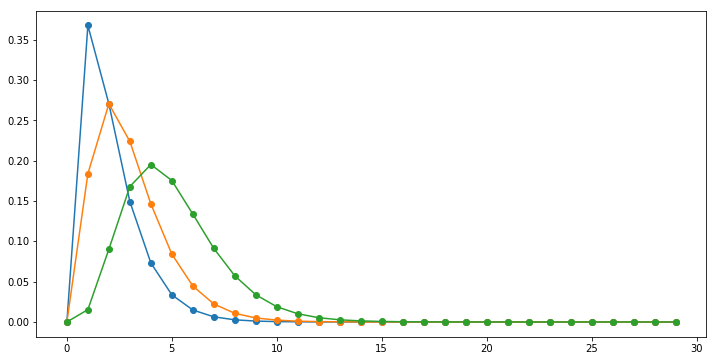

In [3]:
x=np.arange(0,30)
mu_l=[1,2,4,10]
p_l=[poisson.pmf(mu,x) for mu in mu_l]
plt.figure(1,figsize=(12,6))
for i in range(3):
    plt.plot(x,p_l[i],'o-')

In [4]:
#HM Sample Method
def cal_pi(x):
    #i.e PI ~Poisson(2);or PI~N(3,3)
#    prob=poisson.pmf(2,x)
    prob=norm.pdf(x,loc=3,scale=3)
    return prob

T=5000
pi=np.zeros(T)

#Defince Q as the conditional probability given x_t,normally distributed as N~(x_t,1)
for t in range(T-1):
    pi_star=norm.rvs(loc=pi[t],scale=1,size=1,random_state=None)[0]
    #If Q's distribution is symmetric,then q_ij==q_ji
    alpha=min(cal_pi(pi_star)/cal_pi(pi[t]),1)
    u=np.random.uniform(0,1)
    pi[t+1]=pi_star if u<alpha else pi[t]
#     print('pi_star:',pi_star,'pi[t]:',cal_pi(pi[t]),'alpha:',alpha)
    

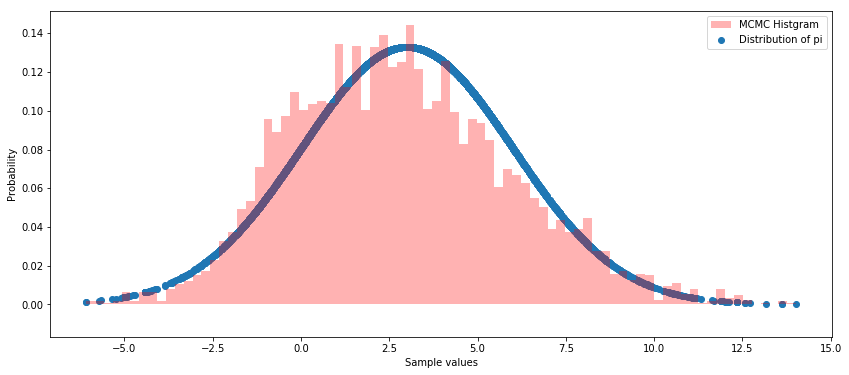

In [5]:
plt.figure(2,figsize=(14,6))
plt.scatter(pi,cal_pi(pi),label='Distribution of pi')
plt.hist(pi,bins=80,density=1,facecolor='r',alpha=0.3,label='MCMC Histgram')
plt.xlabel('Sample values')
plt.ylabel('Probability')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
#Gi